> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables.

### Section I: Introduction
#### Selected dataset: No Show Appointments

>Dataset Description: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<ul>
    <li>PatientId: indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.</li>
    <li>AppointmentID: indicates appoint ID, this field should be unique</li>
    <li>Gender: indicates the patient's gender (M/F)</li>
    <li>ScheduledDay: indicates the Date/Time the patient set up their appointment.</li>
    <li>AppointmentDay: indicates the date/time the patient called to book their appointment.</li>
    <li>Age: indicates the patient's age.</li>
    <li>Neighborhood: indicates the location of the hospital.</li>
    <li>Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li>Hipertension: indicates whether or not the patient is experiencing Hypertension.</li>
    <li>Diabetes: indicates whether or not the patient is experiencing Diabetes.</li>
    <li>Alcoholism: indicates whether or not the patient is experiencing Alcoholism.</li>
    <li>Handcap: indicates whether or not the patient is with special needs.</li>
    <li>SMS_received: indicates whether or not the patient has received a reminder text message.</li>
    <li>Show-up: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names.


### Questions to consider
1. What factors influence a patient to show up for their appointment
2. What is the distribtion of the dataset
3. Does duration of appointment affect the show up rate of patients?
4. Does a specific day or month has an effect on patients' show up rate?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [5]:
# Checking the number of rows and columns of the dataset

df.shape

(110527, 14)

In [6]:
# checking the statistical features of each column

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Everything looks good except that the minimum age is -1 which is impossible and for that matter needs to be investigated for further actions to be taken

In [7]:
# checking the column types and total number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### there are no null values in this dataset


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [9]:
# For the purporse of my analysis, the following columns will be dropped since they are not needed

df.drop(['PatientId', 'AppointmentID', ], axis=1, inplace=True)

In [10]:
# Renaming all columns to a lower case and replacing "-" "_" with nothing for consistent naming

df.rename(columns=lambda x: x.strip().lower().replace("-", ""), inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace("_", ""), inplace=True)

In [11]:
# For the purpose of this analysis, all people below the Age of 1 will not be considered

df.query('age < 1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [12]:
# Dropping the above rows

df.drop(df.query('age < 1').index, inplace=True)
df.query('age < 1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow


In [13]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# checking for duplicate rows

df.duplicated().sum()

626

In [15]:
df[df.duplicated()==True]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
154,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
369,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
466,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
554,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
105997,F,2016-05-31T13:02:47Z,2016-06-01T00:00:00Z,21,SANTA MARTHA,0,0,0,0,0,0,No
106022,M,2016-05-30T11:08:49Z,2016-06-06T00:00:00Z,69,SANTA MARTHA,0,1,0,0,0,0,No
107952,M,2016-06-06T12:49:02Z,2016-06-08T00:00:00Z,26,RESISTÊNCIA,0,0,0,0,0,0,No
108263,M,2016-04-26T13:10:03Z,2016-06-08T00:00:00Z,16,CRUZAMENTO,0,0,0,0,0,0,No


In [16]:

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [17]:
# Convert 'scheduledday' and 'appointmentday' columns from strings to date

df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.date
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date

### Creating three additional columns
#### For the purpose of this analysis, a column will be created for 'waiting_period' that calculates the number of days between scheduledday and appointmentday. Also columns will created for day of week and name of month to aid my analysis

In [18]:
df['dayofweek'] = pd.to_datetime(df.appointmentday).dt.day_name()
df['nameofmonth'] = pd.to_datetime(df.appointmentday).dt.month_name()
df['waitingperiod'] = df.appointmentday - df.scheduledday
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,dayofweek,nameofmonth,waitingperiod
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,April,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,April,0 days


In [19]:
df.shape

(106361, 15)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Questions
1. What is the correlation between each column
2. How does the distribtion of the data looks like?
3. What is the number of patient that showed up versus those that did not show up for each category?

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


#### Exploring the correlation and distribution of the dataset

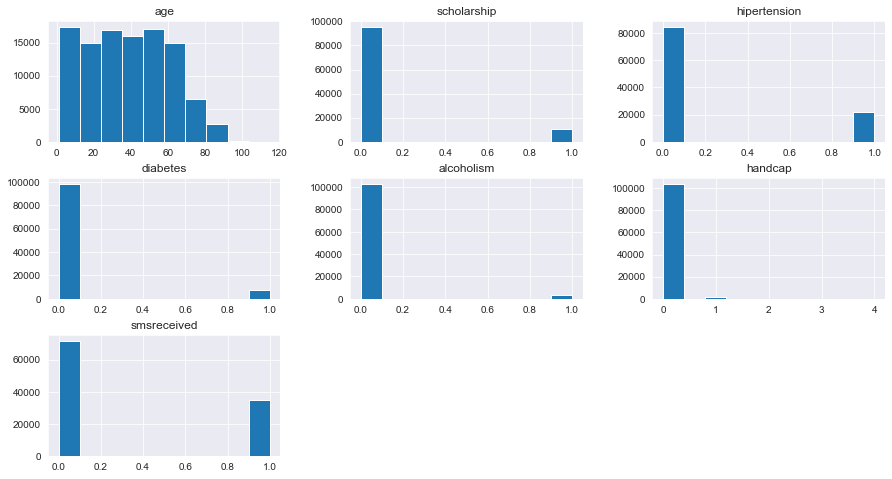

In [21]:
df.hist(figsize=(15,8));

>**Summary**
<ul>
    <li>Age: Most patients are below the age of 20years. Age is fairly distributed between the range of 0-60years.</li>
    <li>Handcap: This dristribution is left skwed as majority of the patients are at hancap level of 0.</li>
    <li>Most of the patients analyzed are not hipertensive, non alcoholism, non diabetic, non scholarship and did not receive an sms.</li>

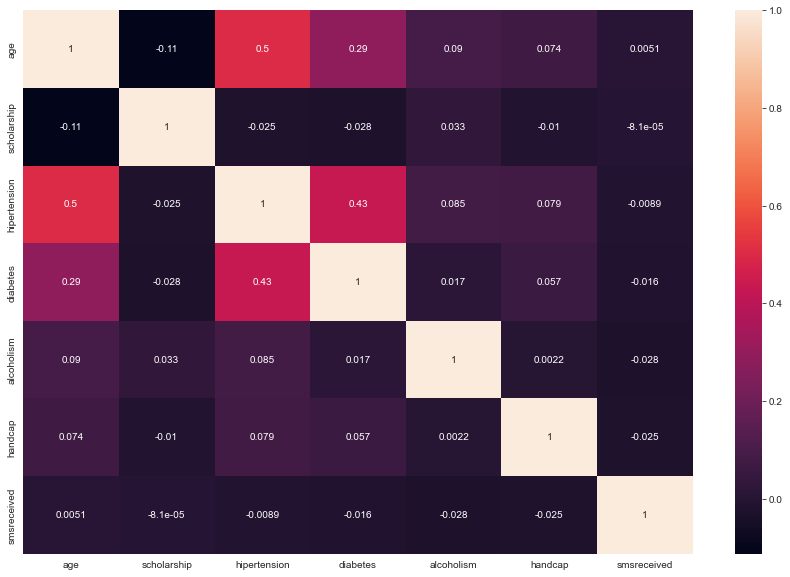

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

>**Summary**
<ul>
    <li>There is a "fair" correlation between age and hipertension with a positive correlation coefficient of 0.5</li>
    <li>There exist a correlation between hipertension and diabetes with a positive correlation coefficient of 0.43</li>
    <li>With a correlation coefficient of 0.29, eventhough it is weak, there exist a positive correlation between age and diabetes.</li>
    <li>With a correlation coefficient of -0.11, eventhough it is weak, there exist a negative correlation between age and scholarship.</li>
    <li>There seem to be little or no correlation between the remaining variables.</li>

#### Creating a function named DisplayChart to use a pie chart to visualize and explore the dataset

In [23]:
def DisplayPieChart(df, x):
    df_pie = df[x].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
    ax.set_title(x + ' distribution percentage per appointment', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)
    

F    65.53
M    34.47
Name: gender, dtype: float64

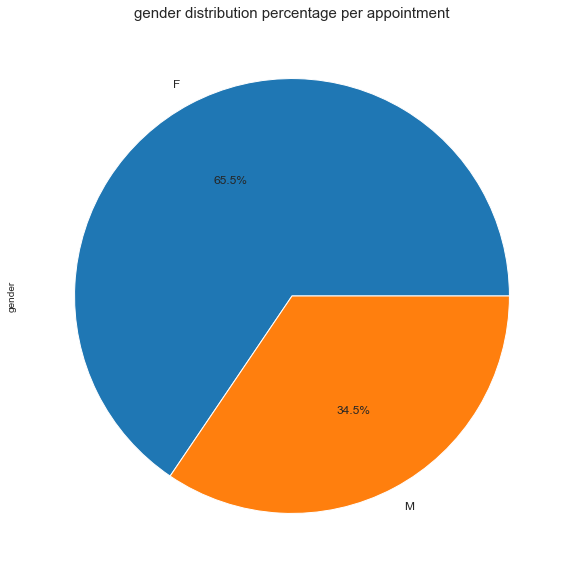

In [24]:
DisplayPieChart(df, 'gender')

>**Summary** 
They dataset is dominated by Females with the total number of female patients constituting 65.5% while males constitute 34.5%

In [25]:
df.groupby('gender')['scheduledday'].count()

gender
F    69699
M    36662
Name: scheduledday, dtype: int64

No     79.82
Yes    20.18
Name: noshow, dtype: float64

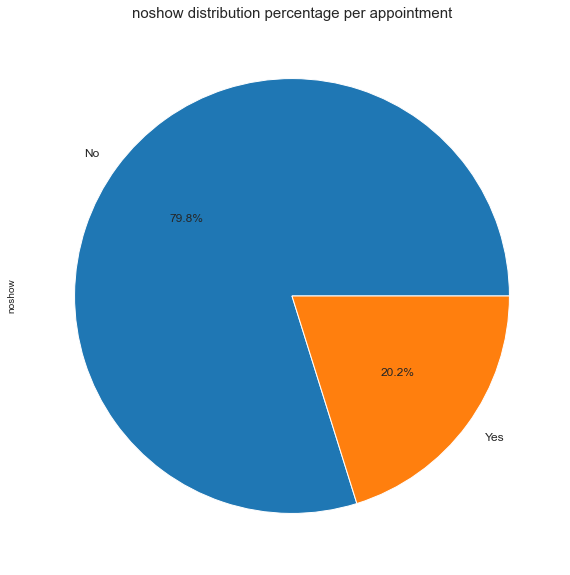

In [26]:
DisplayPieChart(df, 'noshow')

>**Summary** 
The chart above displays that 80% of the patients showed up for their appointment while 20% of patients failed to show up for their medical appointment

In [27]:
# Creating a function to plot bar charts 

def DisplayBarChart(df, variable, label):
    showed = df.query('noshow == "No"')
    not_showed = df.query('noshow == "Yes"')
    showed = showed.groupby(variable).count()['age']
    not_showed = not_showed.groupby(variable).count()['age']
    ind = np.arange(len(df[variable].unique()))
    width = 0.35
    plt.figure(figsize=(15,8))
    red_bars = plt.bar(ind, showed, width, color='r', alpha=.7, label='Showed Up')
    white_bars = plt.bar(ind + width, not_showed, width, color='w', alpha=.7, label='Not Showed')

    # title and labels
    plt.ylabel('Number of People', fontsize=12)
    plt.xlabel(variable,fontsize=12)
    plt.title('Showed Up vs Not Showed by ' + variable, fontsize=15)
    locations = ind + width / 2  # xtick locations
    labels = label  # xtick labels
    plt.xticks(locations, labels)
    

    # legend
    plt.legend();

smsreceived  noshow
0            No        59882
             Yes       11894
1            No        25017
             Yes        9568
Name: age, dtype: int64


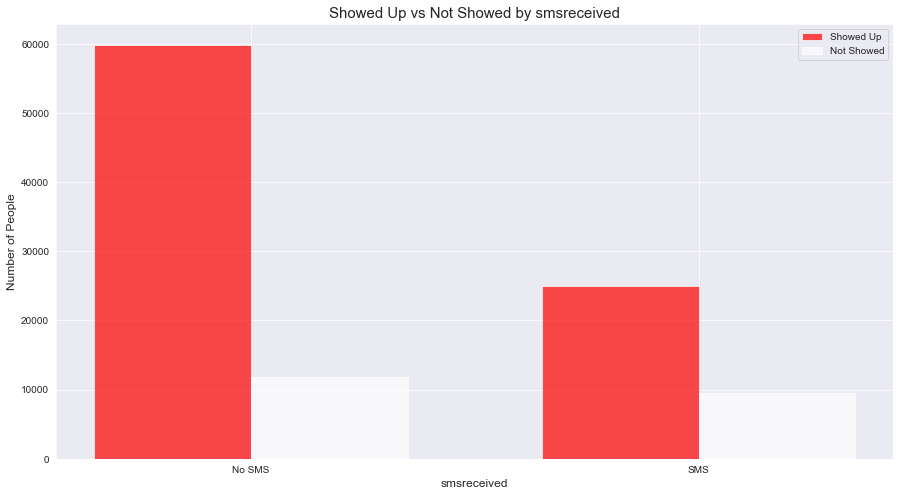

In [28]:
print(df.groupby(['smsreceived','noshow']).count()['age'])
DisplayBarChart(df, 'smsreceived',["No SMS","SMS"])

>**Summary** 
<ul>
    <li>No SMS: Out of the total number of patient that did not receive an sms for their appointment, 59,882 showed up for their appointment while 11,889 patients did not show up for their appointment.</li>
    <li>SMS: Out of the total number of patient that received an sms for their appointment, 25,017 showed up for their appointment while 9,568 patients did not show up for their appointment.</li>

gender  noshow
F       No        55562
        Yes       14137
M       No        29337
        Yes        7325
Name: age, dtype: int64


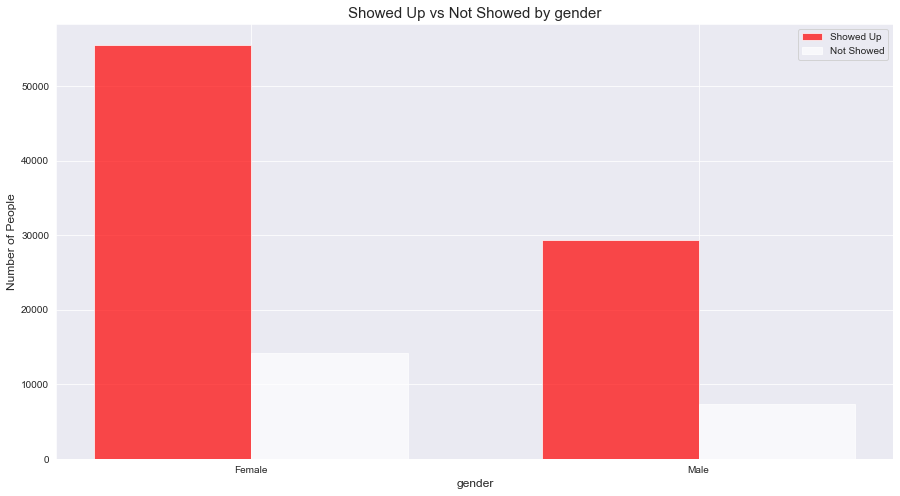

In [29]:
print(df.groupby(['gender','noshow']).count()['age'])
DisplayBarChart(df, 'gender',["Female","Male"])

>**Summary** 
<ul>
    <li>Female: Out of the total number of female patients, 55,562 showed up for their appointment while 14,134 patients did not show up for their appointment.</li>
    <li>Male: Out of the total number of male patients, 29,337 showed up for their appointment while 7,323 patients did not show up for their appointment.</li>

scholarship  noshow
0            No        76699
             Yes       18913
1            No         8200
             Yes        2549
Name: age, dtype: int64


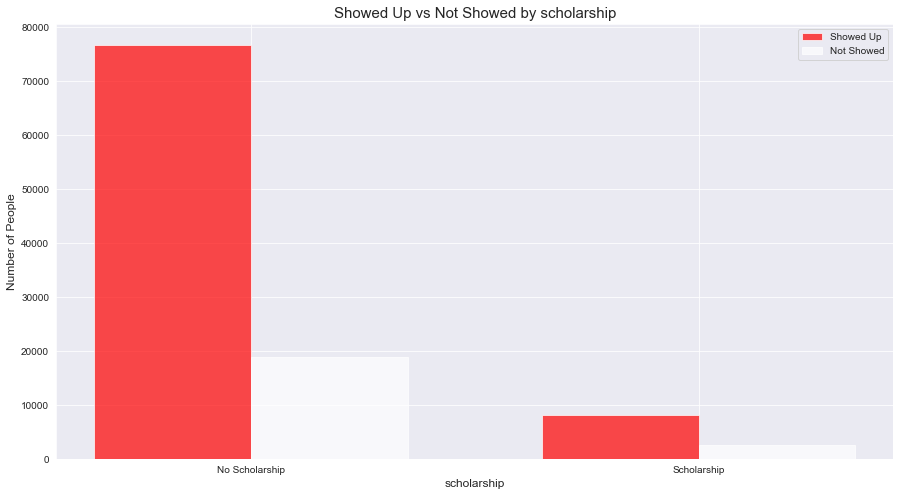

In [30]:
print(df.groupby(['scholarship','noshow']).count()['age'])
DisplayBarChart(df,'scholarship',["No Scholarship", "Scholarship"])

>**Summary** 
<ul>
    <li>No Scholarship: Out of the total number of patients did not receive a scholarship, 76,699 showed up for their appointment while 18,908 patients did not show up for their appointment.</li>
    <li>Scholarship: Out of the total number of patients who received a scholarship, 8,200 showed up for their appointment while 2,549 patients did not show up for their appointment.</li>

hipertension  noshow
0             No        66951
              Yes       17734
1             No        17948
              Yes        3728
Name: age, dtype: int64


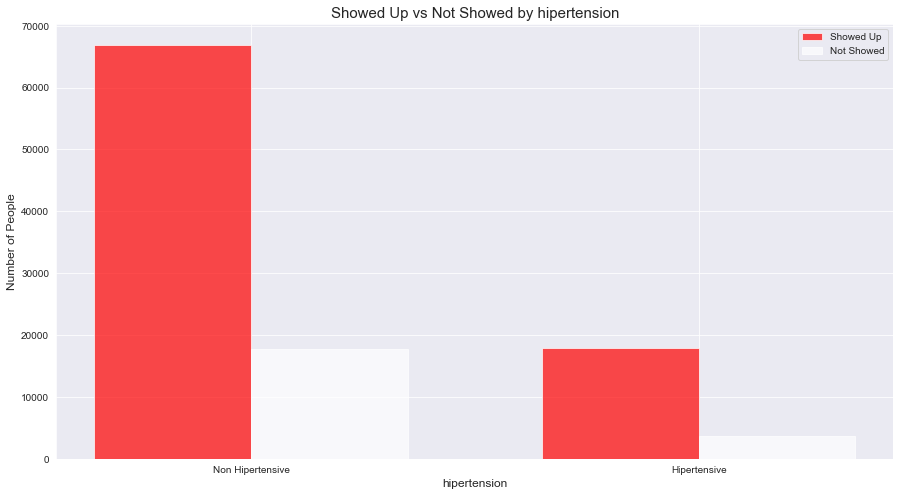

In [31]:
print(df.groupby(['hipertension','noshow']).count()['age'])
DisplayBarChart(df,'hipertension',["Non Hipertensive", "Hipertensive"])

>**Summary** 
<ul>
    <li>Non Hipertensive: Out of the total number of Non-hipertensive patients, 66,951 showed up for their appointment while 17,729 patients did not show up for their appointment.</li>
    <li>Hipertensive: Out of the total number of hipertensive patients, 17,948 showed up for their appointment while 3,728 patients did not show up for their appointment.</li>

diabetes  noshow
0         No        78428
          Yes       20040
1         No         6471
          Yes        1422
Name: age, dtype: int64


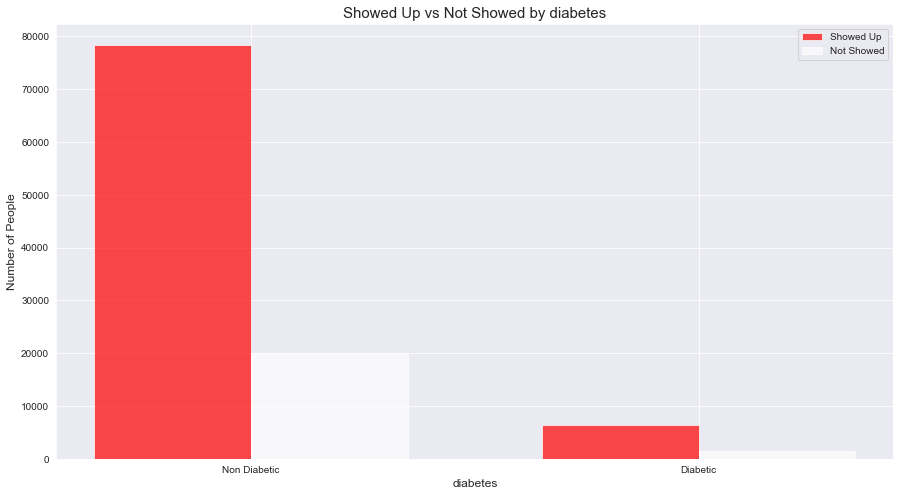

In [32]:
print(df.groupby(['diabetes','noshow']).count()['age'])
DisplayBarChart(df,'diabetes',["Non Diabetic", "Diabetic"])

>**Summary** 
<ul>
    <li>Non Diabetic: Out of the total number of Non-Diabetic patients, 78,428 showed up for their appointment while 20,035 patients did not show up for their appointment.</li>
    <li>Diabetic: Out of the total number of diabetic patients, 6,471 showed up for their appointment while 1,422 patients did not show up for their appointment.</li>

### Research Question 2 
1. Which day of the week does patient show up the most?
2. Which day of the week records the most no-show rate?
3. Does a particular month influences patients, show up rate?

In [33]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [34]:
days = df.groupby('dayofweek').count()['age']
days

dayofweek
Friday       18307
Monday       21762
Saturday        39
Thursday     16586
Tuesday      24700
Wednesday    24967
Name: age, dtype: int64

dayofweek  noshow
Friday     No        14413
           Yes        3894
Monday     No        17302
           Yes        4460
Saturday   No           30
           Yes           9
Thursday   No        13368
           Yes        3218
Tuesday    No        19729
           Yes        4971
Wednesday  No        20057
           Yes        4910
Name: age, dtype: int64


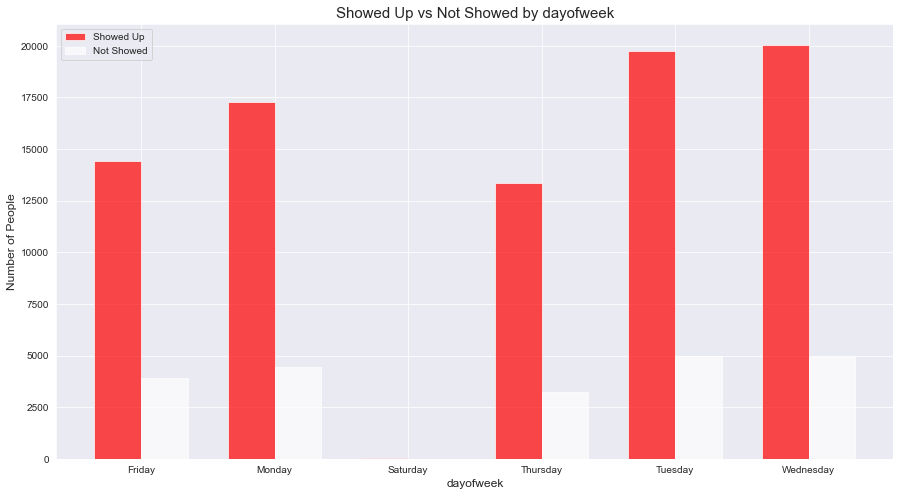

In [35]:
print(df.groupby(['dayofweek','noshow']).count()['age'])
DisplayBarChart(df,'dayofweek', days.index)

>**Summary** 
<ul>
    <li>Friday: Out of the total number of patients that booked Friday for their appointment, 14,413 showed up while 3,894 patients did not show up.</li>
    <li>Monday: Out of the total number of patients that booked Monday for their appointment, 17,302 showed up while 4,459 patients did not show up.</li>
    <li>Saturday: Out of the total number of patients that booked Saturday for their appointment, 30 showed up while 9 patients did not show up.</li>
    <li>Thursday: Out of the total number of patients that booked Thursday for their appointment, 13,368 showed up while 3,217 patients did not show up.</li>
    <li>Tuesday: Out of the total number of patients that booked Tuesday for their appointment, 19,729 showed up while 4,969 patients did not show up.</li>
    <li>Wednesday: Out of the total number of patients that booked Wednesday for their appointment, 20,057 showed up while 4,909 patients did not show up.</li>

In [36]:
months = df.groupby('nameofmonth').count()['age']
months

nameofmonth
April     3088
June     25601
May      77672
Name: age, dtype: int64

nameofmonth  noshow
April        No         2487
             Yes         601
June         No        20855
             Yes        4746
May          No        61557
             Yes       16115
Name: age, dtype: int64


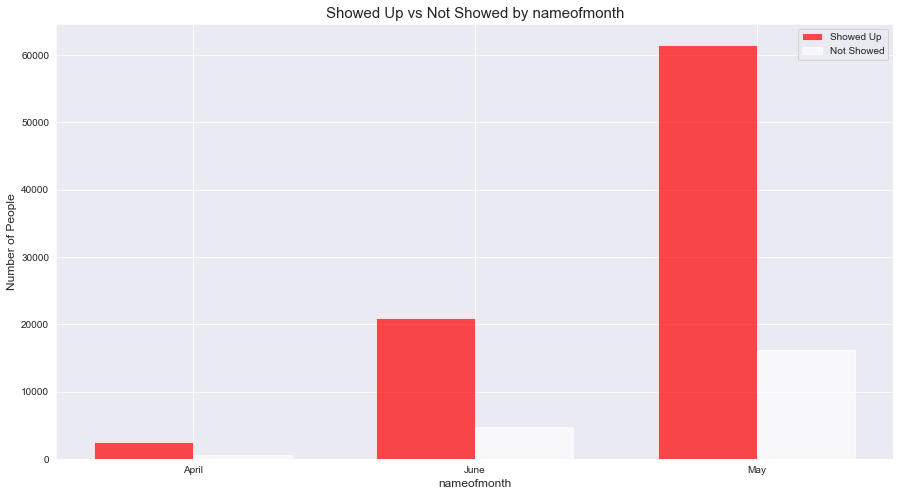

In [37]:
print(df.groupby(['nameofmonth','noshow']).count()['age'])
DisplayBarChart(df,'nameofmonth',months.index)

>**Summary** 
<ul>
    <li>April: Out of the total number of patients that booked for their appointment in April, 2,487 showed up while 601 patients did not show up.</li>
    <li>June: Out of the total number of patients that booked for their appointment in June, 20,855 showed up while 4,746 patients did not show up.</li>
    <li>May: Out of the total number of patients that booked for their appointment in May, 61,557 showed up while 16,110 patients did not show up.</li>

In [38]:
df.waitingperiod.describe()

count                        106361
mean     10 days 03:21:25.813409050
std      15 days 06:13:45.695593884
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                14 days 00:00:00
max               179 days 00:00:00
Name: waitingperiod, dtype: object

In [39]:
df[df['waitingperiod'] < "0 days"]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,dayofweek,nameofmonth,waitingperiod
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,May,-1 days
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,May,-1 days
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,May,-1 days
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,May,-6 days
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,May,-1 days


#### strangely, the waiting period column contains 5 records with a negative duration period which implies that their appointment was met even before it was scheduled which I believe it is an error. Hence these records will be dropped before further anlysis of this column could be made.

In [40]:
# dropping rows with negative waiting period
df.drop(df[df['waitingperiod'] < "0 days"].index, inplace=True)
df[df['waitingperiod'] < "0 days"]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,dayofweek,nameofmonth,waitingperiod


In [41]:
# coverting waiting data type to int for convenience
df['waitingperiod'] = (df.appointmentday - df.scheduledday).astype('timedelta64[D]').astype(int)

waitingcats = [ "{0} - {1}".format(i, i + 29) for i in range(0, 180, 30)]
df['period'] = pd.cut(df.waitingperiod, range(0, 181, 30), right=False, labels=waitingcats)


In [42]:
periodcat = df.groupby('period').count()['age']
periodcat

period
0 - 29       95808
30 - 59       8441
60 - 89       1838
90 - 119       184
120 - 149       29
150 - 179       56
Name: age, dtype: int64

period     noshow
0 - 29     No        77799
           Yes       18009
30 - 59    No         5596
           Yes        2845
60 - 89    No         1303
           Yes         535
90 - 119   No          145
           Yes          39
120 - 149  No           18
           Yes          11
150 - 179  No           38
           Yes          18
Name: age, dtype: int64


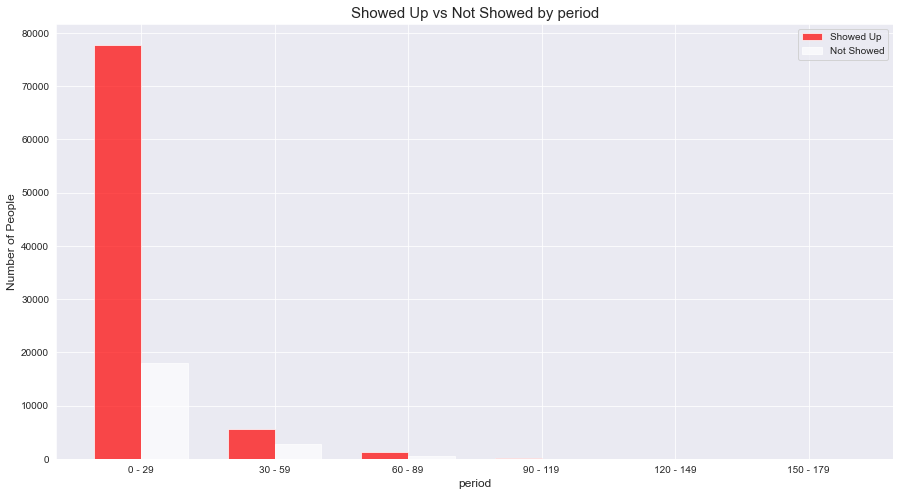

In [43]:
print(df.groupby(['period','noshow']).count()['age'])
DisplayBarChart(df, 'period', periodcat.index)

>**Summary** 
<ul>
    <li>0 - 29: A total number of 95,808 patients booked their appointment within 0 - 29 days of their scheduled day. Out of this, 77,799 patients showed up while 18,009 patients failed to show up.</li>
    <li>30 - 59: A total number of 8,441 patients booked their appointment within 30 - 59 days of their scheduled day. Out of this, 5,596 patients showed up while 2,845 patients failed to show up.</li>
    <li>60 - 89: A total number of 1,838 patients booked their appointment within 60 - 89 days of their scheduled day. Out of this, 1,303 patients showed up while 535 patients failed to show up.</li>
    <li>90 - 119:  A total number of 184 patients booked their appointment within 90 - 119 days of their scheduled day. Out of this, 145 patients showed up while 39 patients failed to show up.</li>
    <li>120 - 149:  A total number of 29 patients booked their appointment within 120 - 149 days of their scheduled day. Out of this, 18 patients showed up while 11 patients failed to show up.</li>
    <li>150 - 179:  A total number of 56 patients booked their appointment within 150 - 179 days of their scheduled day. Out of this, 38 patients showed up while 18 patients failed to show up.</li>

In [44]:
df.age.describe()

count    106356.000000
mean         38.321054
std          22.475383
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [45]:
# Creating age groups

catnames = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['agegroup'] = pd.cut(df.age, range(0, 121, 20), right=False, labels=catnames)


In [46]:
agecat = df.groupby('agegroup').count()['age']
agecat

agegroup
0 - 19       26720
20 - 39      28664
40 - 59      29893
60 - 79      17738
80 - 99       3332
100 - 119        9
Name: age, dtype: int64

agegroup   noshow
0 - 19     No        20669
           Yes        6051
20 - 39    No        22057
           Yes        6607
40 - 59    No        24303
           Yes        5590
60 - 79    No        15067
           Yes        2671
80 - 99    No         2796
           Yes         536
100 - 119  No            7
           Yes           2
Name: age, dtype: int64


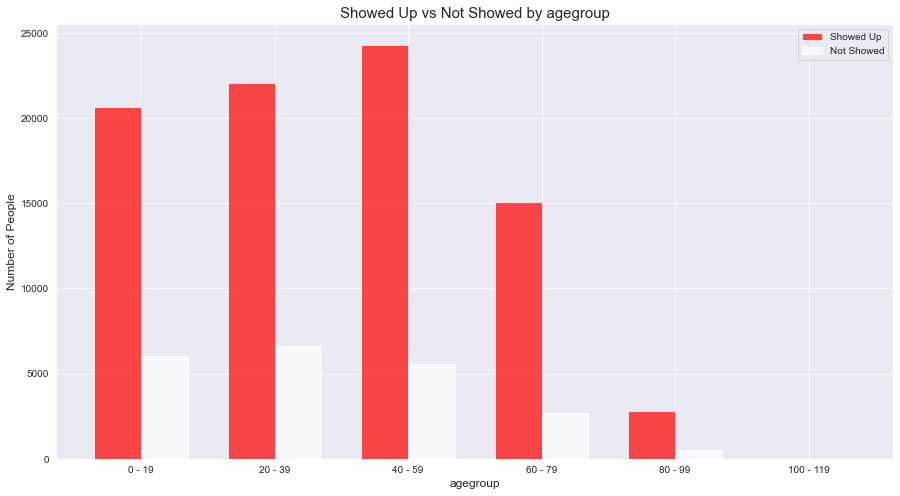

In [47]:
print(df.groupby(['agegroup','noshow']).count()['age'])
DisplayBarChart(df, 'agegroup', agecat.index)

>**Summary** 
<ul>
    <li>0 - 19: A total number of 26,720 patients are within the age bracket of 0 - 19 years. Out of this, 20,669 patients showed up while 6,051 patients failed to show up.</li>
    <li>20 - 39: A total number of 28,664 patients are within the age bracket of 20 - 39 years. Out of this, 22,057 patients showed up while 6,607 patients failed to show up.</li>
    <li>40 - 59: A total number of 29,893 patients are within the age bracket of 40 - 59 years. Out of this, 24,303 patients showed up while 5,590 patients failed to show up.</li>
    <li>60 - 79:  A total number of 17,738 patients are within the age bracket of 60 - 79 years. Out of this, 15,067 patients showed up while 2,671 patients failed to show up.</li>
    <li>80 - 99:  A total number of 3,332 patients are within the age bracket of 80 - 99 years. Out of this, 2,796 patients showed up while 536 patients failed to show up.</li>
    <li>100 - 119:  A total number of 9 patients are within the age bracket of 100 - 119 years. Out of this, 7 patients showed up while 2 patients failed to show up.</li>

<a id='conclusions'></a>
## Conclusions

> **Findings1**: From the heat map, there seems to be a "fair" correlation between **age and hipertension** and **hipertension and diabetes**. For this dataset, there are more females than males.

> **Findings2**: Wednesdays is the day that patients show up for appointment the most. Of the three months analyzed, May is appears to be the favorable day for appointment show up and lastly, patients show up for appointment if their appointmnt date is within 30 days of their scheduled date. 

> **Findings3**: Eventhough the number of patient that showed up without receiving sms were many, I feel that the percentage of people that received sms were very small and I would recommend measures are put in place to reach out to these patients to remind them of their appointments. Generally, People between the ages of 40-59 have a better show up rate as compared to the others.

> **Note**: Inasmuuch as the researcher triedto explore the data to highlight hidden features and insights, there are still limitations to this study in that location of the hospital was completely disregarded as well as the researcher acknowledges the possibility of other factors external to this study that equally have the possiblity to influence patients' show up rate. In light of this, these findings are not conclusive but could be used for further investigation.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295